### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-16,444248,4670529,670273,589246,270348,135134,130167,192340,116511,92906,85739,125782,116072,4849,198891
2021-09-17,444529,4679137,672635,589573,270538,135314,130233,193111,116618,92928,85783,125826,116436,4849,198891
2021-09-18,444838,4685838,673472,590508,270538,135478,130284,193891,116662,92964,85783,125860,116791,4849,198976
2021-09-19,445133,4691849,673774,590752,271503,135539,130310,194671,116696,92977,85783,125895,117182,4849,199066
2021-09-20,445385,4700003,676076,590955,271765,135589,130354,195438,116765,93058,85901,125924,117526,4849,199036


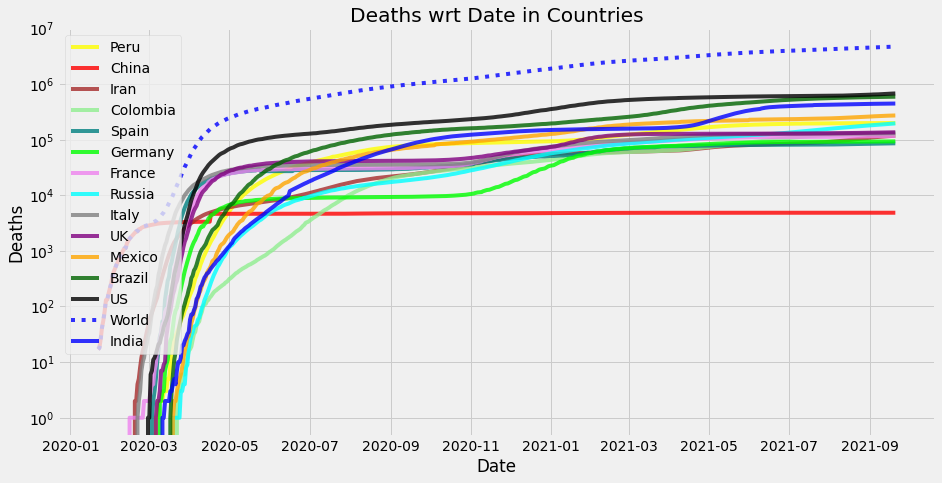

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-16,34403,577610,157957,34407,7040,26619,5115,19288,14384,11816,4075,1484,18021,84,1068
2021-09-17,35662,593099,207886,11202,3754,32566,4544,19589,7756,9904,3222,1544,17605,49,0
2021-09-18,30773,532986,56849,150106,0,29476,4576,19999,7972,7103,0,1655,12847,71,2039
2021-09-19,30256,358548,37533,9458,16694,29298,3836,19825,5944,5667,0,1813,15975,52,589
2021-09-20,26115,540395,201648,7884,3367,35943,2405,19376,1547,5328,5988,1185,17397,77,644


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-16,35543,587323,148414,21210,12795,32664,5299,18778,13097,9035,6680,2608,26611,50,983
2021-09-17,35551,587708,152379,20542,12192,32657,5249,18832,12741,9093,6449,2537,26011,50,917
2021-09-18,35232,584060,146010,29180,11379,32445,5204,18910,12423,8961,6019,2478,25133,51,992
2021-09-19,34900,569026,138778,27865,11733,32235,5113,18971,11991,8741,5618,2434,24522,51,965
2021-09-20,34315,567117,142969,26533,11176,32483,4932,18998,11295,8513,5642,2350,24047,53,944


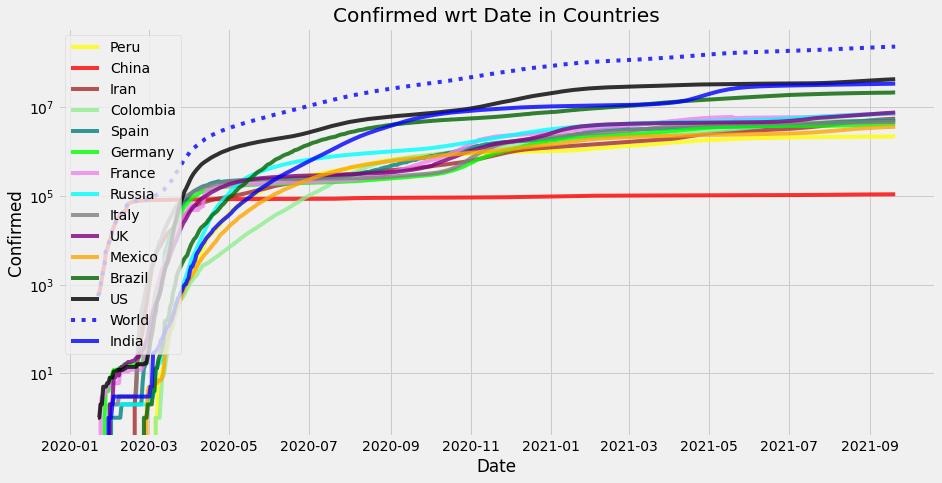

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-16,320,10431,3410,649,435,159,67,774,41,63,101,29,453,0,31
2021-09-17,281,8608,2362,327,190,180,66,771,107,22,44,44,364,0,0
2021-09-18,309,6701,837,935,0,164,51,780,44,36,0,34,355,0,85
2021-09-19,295,6011,302,244,965,61,26,780,34,13,0,35,391,0,90
2021-09-20,252,8154,2302,203,262,50,44,767,69,81,118,29,344,0,-30


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-16,339.78,9351.41,1907.78,578.37,655.44,138.45,58.32,768.49,93.45,46.51,88.30,51.53,499.31,0.08,38.23
2021-09-17,332.43,9258.48,1964.56,546.95,597.26,143.64,59.28,768.80,95.14,43.45,82.76,50.59,482.40,0.07,33.45
2021-09-18,329.50,8938.80,1823.61,595.46,522.60,146.19,58.24,770.20,88.75,42.52,72.41,48.52,466.47,0.06,39.89
2021-09-19,325.19,8572.82,1633.41,551.52,577.90,135.54,54.21,771.43,81.91,38.83,63.36,46.83,457.04,0.06,46.16
2021-09-20,316.04,8520.47,1716.98,507.96,538.42,124.85,52.94,770.87,80.29,44.10,70.19,44.60,442.91,0.05,36.64


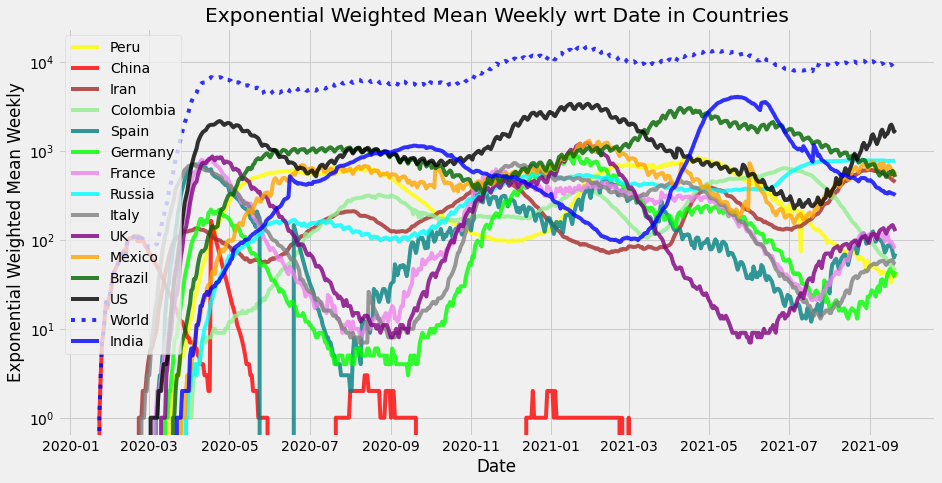

In [18]:
plotter(np.round(AVG), name)

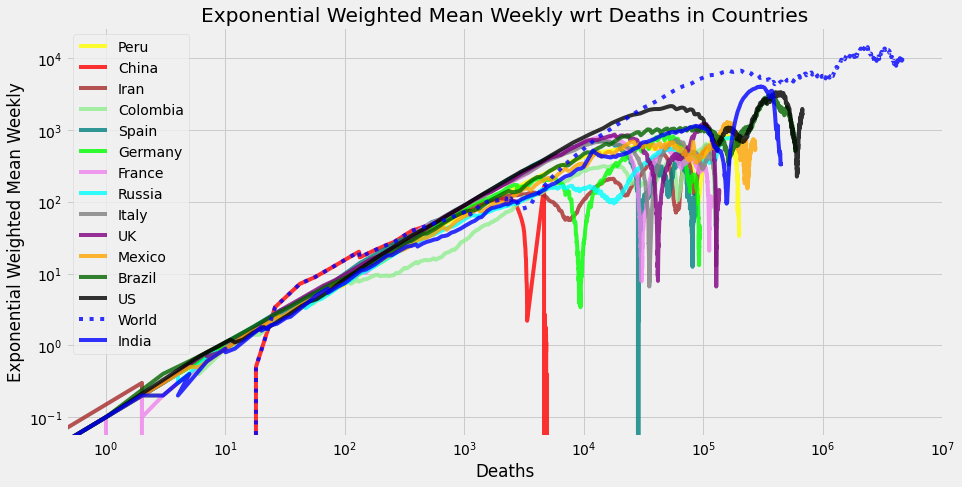

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

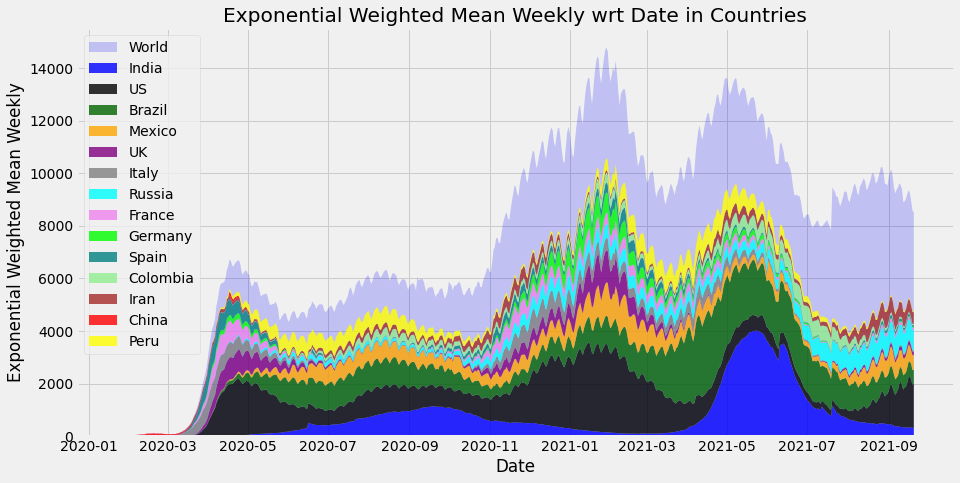

In [20]:
stackplotter(AVG, name)

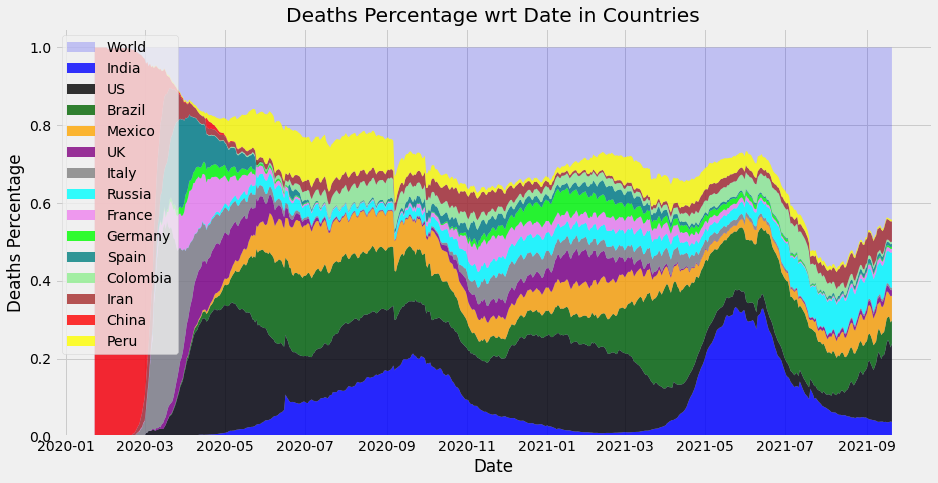

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

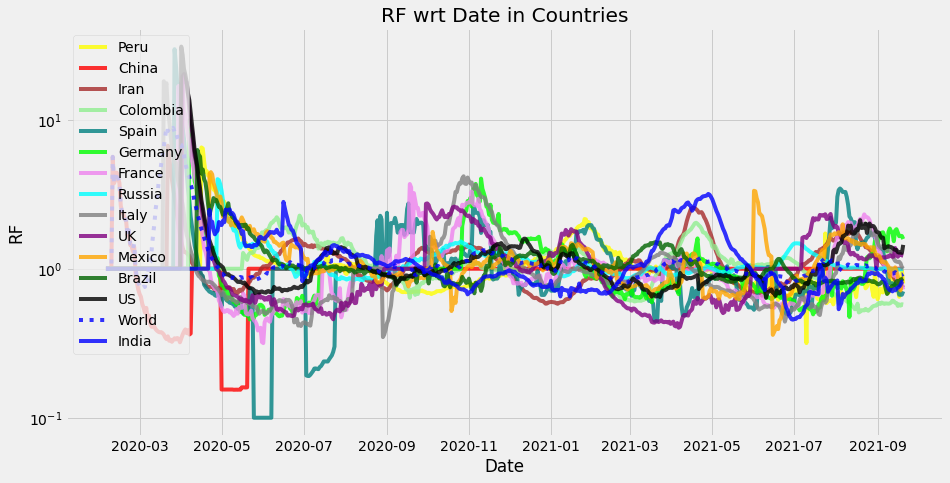

In [23]:
plotter(Reproductivity, 'RF')

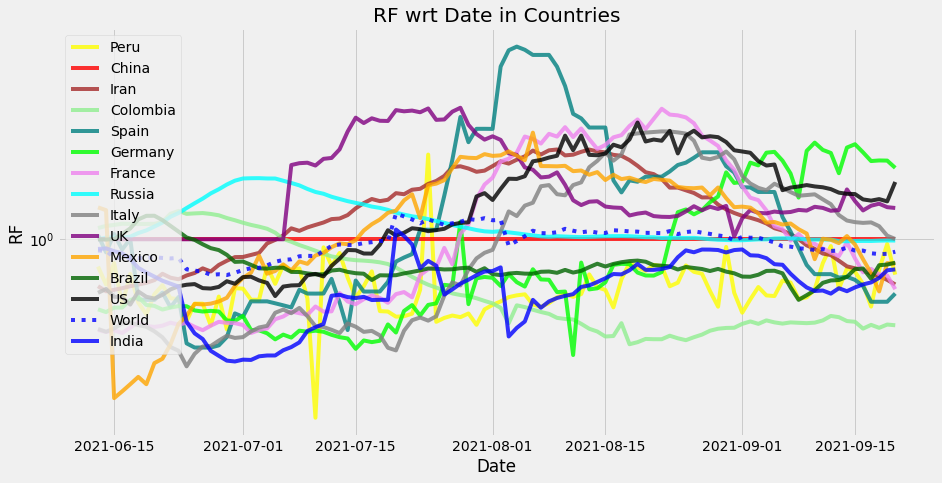

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

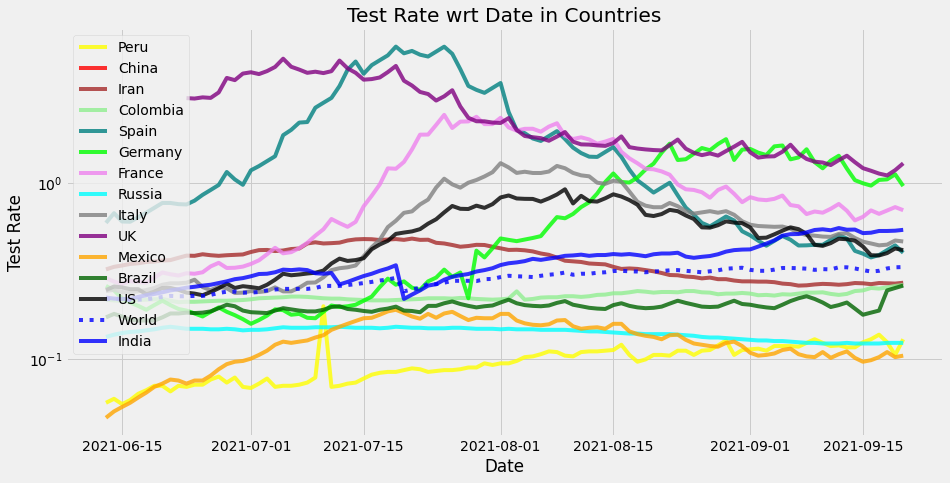

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

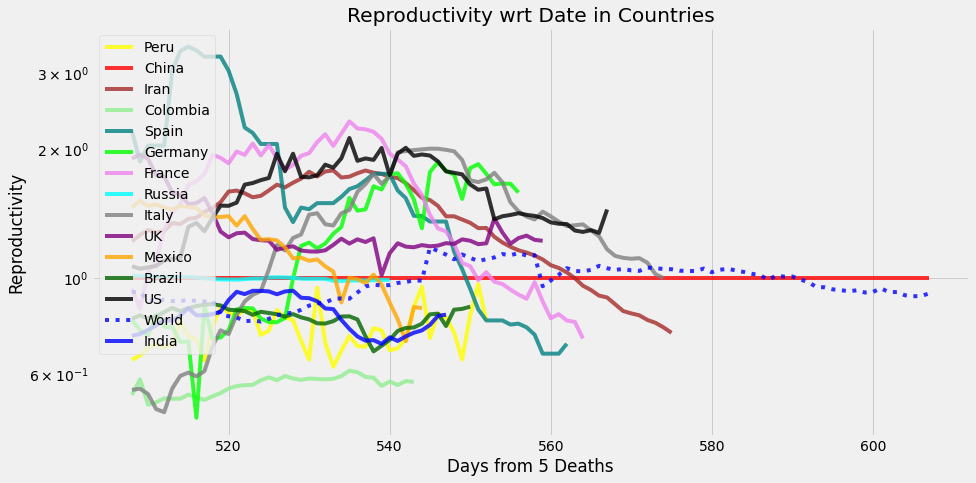

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

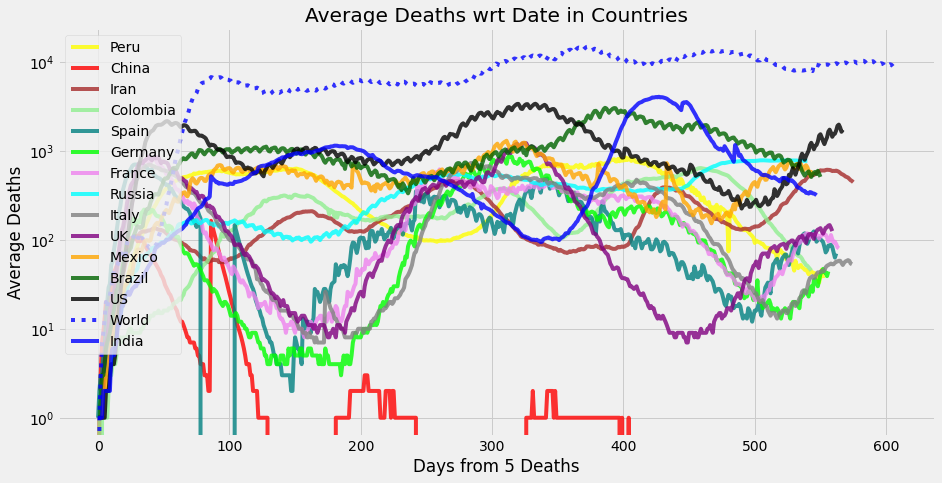

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

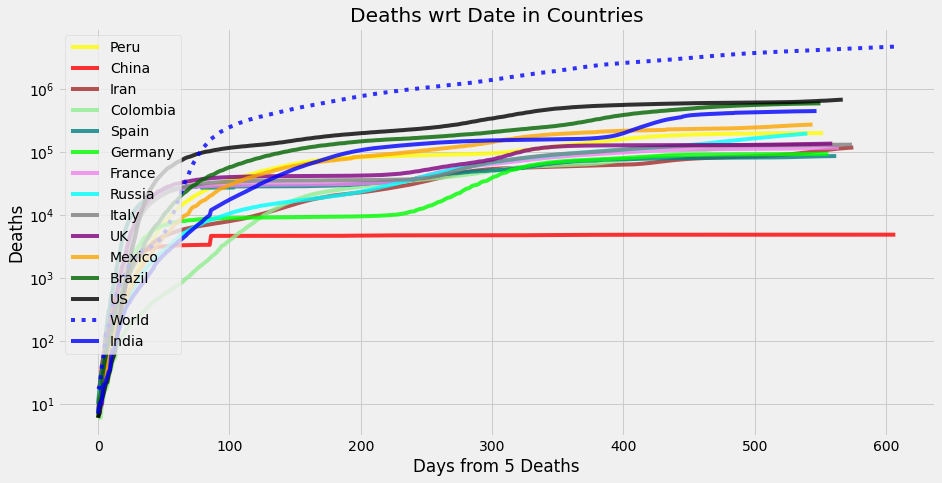

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4700003,8154,8578.00,8520.47,0.9232,229081278,0.333,567117,940.00
US,676076,2302,1947.43,1716.98,1.4460,42289819,0.416,142969,135.22
Brazil,590955,203,555.57,507.96,0.8601,21247667,0.261,26533,118.19
India,445385,252,310.29,316.04,0.8238,33504534,0.543,34315,89.08
Mexico,271765,262,542.29,538.42,0.8538,3573044,0.104,11176,54.35
Peru,199036,-30,33.86,36.64,0.7965,2167652,0.129,944,39.81
Russia,195438,767,772.43,770.87,0.9920,7189445,0.123,18998,39.09
Indonesia,140634,166,209.86,313.86,0.4394,4192695,0.132,8280,28.13
UK,135589,50,143.14,124.85,1.2232,7500734,1.301,32483,27.12


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4700003,8154,8578.00,8520.47,0.9232,229081278,0.333,567117,940.00
US,676076,2302,1947.43,1716.98,1.4460,42289819,0.416,142969,135.22
Russia,195438,767,772.43,770.87,0.9920,7189445,0.123,18998,39.09
Brazil,590955,203,555.57,507.96,0.8601,21247667,0.261,26533,118.19
Mexico,271765,262,542.29,538.42,0.8538,3573044,0.104,11176,54.35
Iran,117526,344,395.29,442.91,0.7478,5442232,0.271,24047,23.51
Malaysia,23744,301,374.29,356.84,1.2312,2112175,0.257,18308,4.75
India,445385,252,310.29,316.04,0.8238,33504534,0.543,34315,89.08
Turkey,61805,231,241.14,241.19,0.9569,6874917,0.491,23671,12.36


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4700003


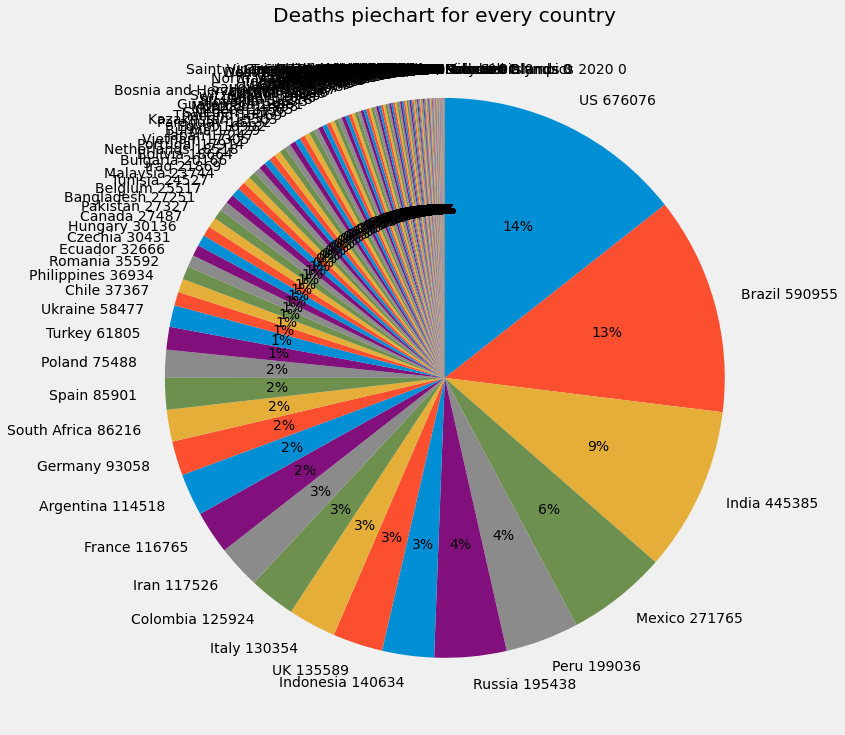

In [35]:
piechart('Deaths')

World total:  8578


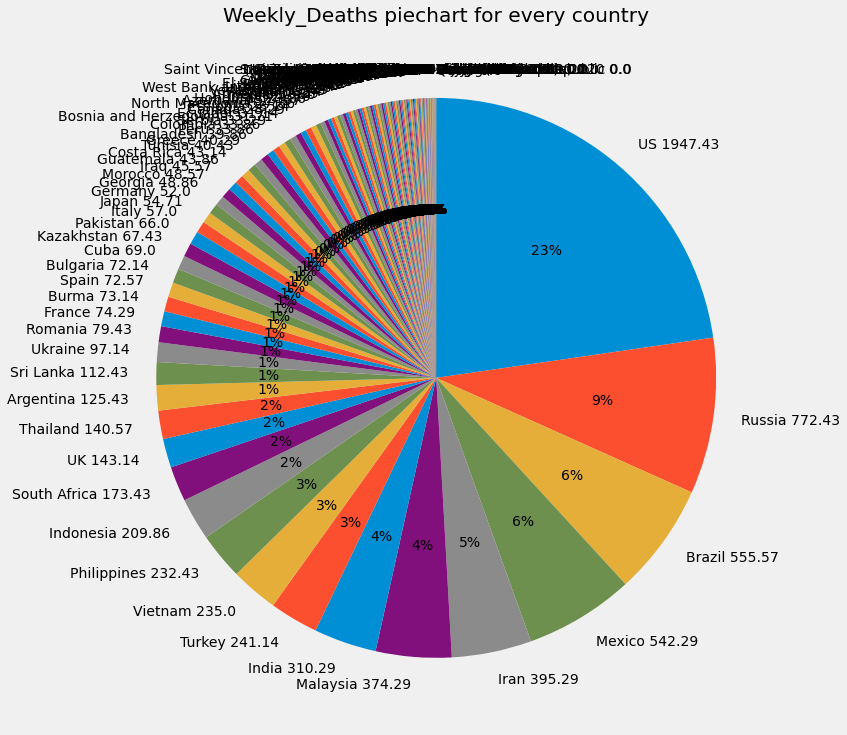

In [36]:
piechart('Weekly_Deaths')

World total:  8154


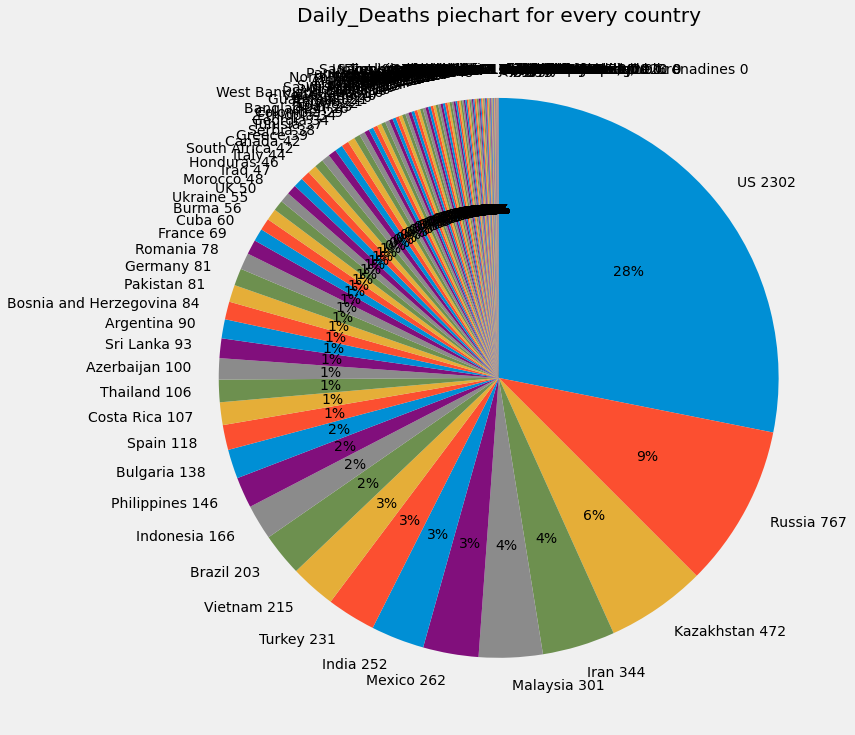

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-09-21


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

940000600.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master d801ccf] `date` update
 1 file changed, 2125 insertions(+), 2124 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (67%)


To https://github.com/Arrowheadahp/COVID-19.git
   b16f530..d801ccf  master -> master
